In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
# Loads nicard and scope
manager.startModule('logic','cavitylogic')

Connected to TEKTRONIX,DPO2014B,C010144,CF:91.1CT FV:v1.52 


# Initialize set up


* Amplifyer is fet -15V and = +85V 
* Calibrate strain gauge to zero with the kinesis software
* Pull fiber back
* Set nicard to -3.75

In [4]:
cavitylogic._ni.cavity_set_voltage(0.0)

0

In [5]:
cavitylogic._current_filepath = r'C:\BittorrentSyncDrive\Personal - Rasmus\Rasmus notes\Measurements\170919_position2'

In [6]:
cavitylogic.current_mode_number=30

* Move close with fiber

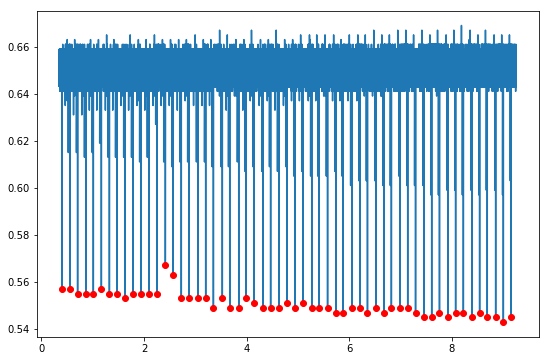

In [10]:
first_resonances = cavitylogic.get_nth_full_sweep(sweep_number=1)

In [11]:
cavitylogic.ramp_popt = cavitylogic._fit_ramp(xdata=cavitylogic.time_trim[::9], ydata=cavitylogic.volts_trim[cavitylogic.ramp_channel,::9])
Modes = cavitylogic._ni.sweep_function(cavitylogic.RampUp_time[first_resonances],*cavitylogic.ramp_popt)

In [12]:
len(first_resonances)

57

In [13]:
cavitylogic.linewidth_measurement(Modes,target_mode = cavitylogic.current_mode_number, repeat=10, freq=40)

0

In [ ]:
high_mode=54
low_mode=0

for i in range(26):
    cavitylogic.current_mode_number +=1
    corrected_resonances = cavitylogic.get_nth_full_sweep(sweep_number=2+i)
    target_mode = cavitylogic.get_target_mode(corrected_resonances, low_mode=low_mode, high_mode=high_mode, plot=True)
    cavitylogic.ramp_popt = cavitylogic._fit_ramp(xdata=cavitylogic.time_trim[::9], ydata=cavitylogic.volts_trim[cavitylogic.ramp_channel,::9])
    Modes = cavitylogic._ni.sweep_function(cavitylogic.RampUp_time[corrected_resonances],*cavitylogic.ramp_popt)
    cavitylogic.linewidth_measurement(Modes,target_mode = target_mode, repeat=10, freq=40)